<a href="https://colab.research.google.com/github/N3haS/Landmark-detection-py/blob/main/Landmark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.13.1 which is incompatible.


In [ ]:
import urllib.request
urllib.request.urlretrieve(r"https://s3.amazonaws.com/google-landmark/train/images_104.tar" , 'Neha_Coincent_Internship')

('Neha_Coincent_Internship', <http.client.HTTPMessage at 0x7ab567ae26e0>)

In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


In [ ]:
pip install pillow

In [ ]:
pip install scikit-learn

# DATA CLEANING AND PREPROCESSING

In [ ]:
# Import Librabries
import numpy as np
import pandas as pd
import keras        # pip install keras==2.8.0
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [ ]:
df = pd.read_csv("train.csv")
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [ ]:
df = df.loc[df["id"].str.startswith(('35'), na=False), :]
ncls = len(df["landmark_id"].unique())
nd = len(df)

In [ ]:
ncls

5457

In [ ]:
nd

6214

In [ ]:
d = pd.DataFrame(df["landmark_id"].value_counts())
d.reset_index(inplace=True)

In [ ]:
d.head()

,index,landmark_id
0,138982,23
1,126637,9
2,162833,7
3,20409,6
4,36748,6


In [ ]:
d.tail()

,index,landmark_id
5452,82734,1
5453,82668,1
5454,82666,1
5455,82635,1
5456,103235,1


In [ ]:
d.columns=['landmark_id','count']

In [ ]:
d

,landmark_id,count
0,138982,23
1,126637,9
2,162833,7
3,20409,6
4,36748,6
...,...,...
5452,82734,1
5453,82668,1
5454,82666,1
5455,82635,1


In [ ]:
d["count"].describe()

count    5457.000000
mean        1.138721
std         0.543555
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        23.000000
Name: count, dtype: float64

(array([0.000e+00, 4.882e+03, 0.000e+00, 4.650e+02, 7.800e+01, 0.000e+00,
        1.800e+01, 9.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

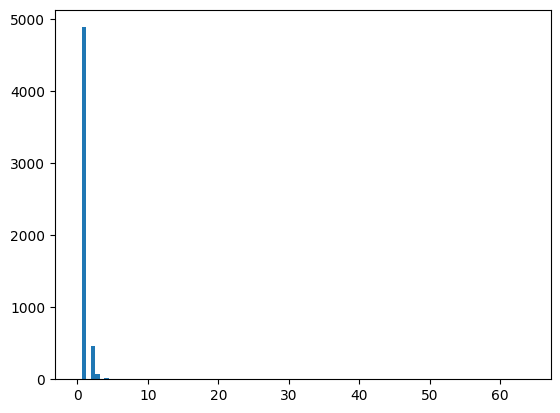

In [ ]:
plt.hist(d['count'], 100, range = (0,64), label = 'test')

In [ ]:
d['count'].between(0,5).sum()

5452

In [ ]:
d['count'].between(5,10).sum()

13

In [ ]:
d['count'].between(10,15).sum()

0

(array([3., 1., 1., ..., 1., 1., 3.]),
 array([2.70000e+01, 3.00000e+01, 4.30000e+01, ..., 2.03029e+05,
        2.03071e+05, 2.03083e+05]),
 <BarContainer object of 5456 artists>)

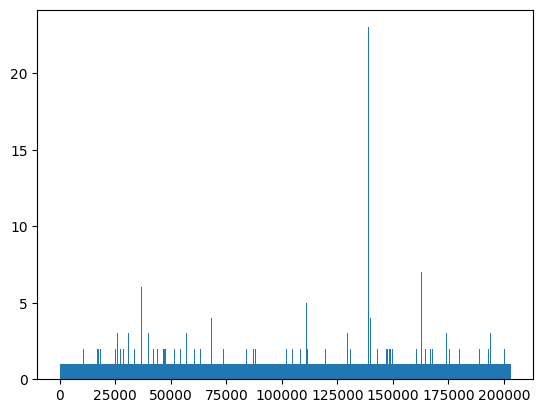

In [ ]:
plt.hist(df["landmark_id"],bins=df["landmark_id"].unique())

# MODEL TRAINING

In [ ]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(df["landmark_id"])

LabelEncoder()

In [ ]:
df

,id,landmark_id
210,350c35dd0e716f5d,27
211,359be3976d32167d,27
212,35d6b2fc94ad86f5,27
628,358dedd3139da44d,30
711,35a51fa09d087788,43
...,...,...
1579717,357073888d8d6647,202972
1580061,35865058fc352861,203029
1580291,3573ee9c16f9b3bf,203071
1580421,359addbaa70e8db9,203083


In [ ]:
def encode_label(label1):
    return lenc.transform(label1)

In [ ]:
def decode_label(label1):
    return lenc.transform(label1)

In [ ]:
def get_img_from_no(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(r"C:/Users/neha/Coincent_internship/images",f1,f2,f3,fname)
    im = cv2.imread( path)
    return img, label

In [ ]:
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    rnimg = random.choices(os.listdir("./images"), k=3)
    print("From 35\n",rnimg)
    folder = "./images" + '/' +"3" + '/' + "5" + '/' + rnimg[2]
    r_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+r_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

From 35
 ['3', '3', '3']


FileNotFoundError: [Errno 2] No such file or directory: './images/3/5/3'

<Figure size 1600x1600 with 0 Axes>

## MODEL BUILDING

In [ ]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [ ]:
# Parameters
learning_rate = 0.0001
decay_speed   = 1e-6
momemtum      = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model  = VGG19(weights=None)
drop_layer    = Dropout(0.5)
drop_layer2   = Dropout(0.5)

In [ ]:
ldmodel = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        ldmodel.add(BatchNormalization())
    ldmodel.add(layer)
ldmodel.add(Dense(ncls, activation = "softmax"))
ldmodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [ ]:
ldmodel.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate = learning_rate),
             loss=loss_function,
             metrics = ["accuracy"])

In [ ]:
def image_reshape(img, size):
    return cv2.resize(img, size)

In [ ]:
def get_batch(dframe, start, batch_size):
    img_array = []
    label_array = []

    end_img = start+batch_size
    if(end_img) > len(dframe):
        end_img = len(dframe)

    for idx in range(start, end_img):
        n = idx
        img, label = get_img_from_no(n, dframe)
        img = image_reshape(img, (224, 224)) / 255.0
        img_array.append(img)
        label_array.append(label)

    label_array = encode_label(label_array)

    return np.array(img_array), np.array(label_array)

In [ ]:
batch_size = 64
epoch_shuffle = True
weight_classes = True
epochs = 1

# split
train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

4971
1243


In [ ]:
for e in range(epochs):
    print("Epoch :" + str (e+1) + "/"+ str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)

        ldmodel.train_on_batch(X_train, y_train)

ldmodel.save("Model")

Epoch :1/1
